In [29]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

In [30]:
import piplite
await piplite.install(['numpy'],['pandas'])
# Install seaborn using piplite
import piplite
await piplite.install('seaborn')


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
from js import fetch
import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())



In [44]:
boston_df = pd.read_csv(boston_url)

In [45]:
# Display the first few rows of the dataset to verify it's loaded correctly
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


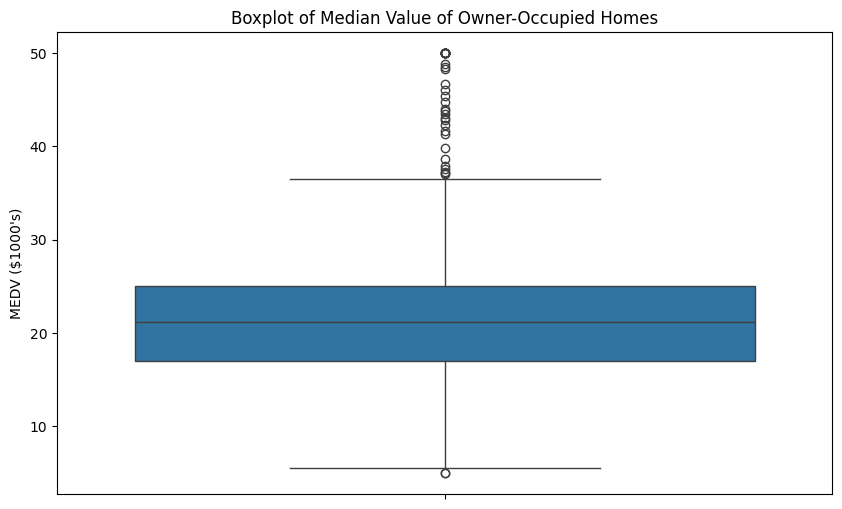

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('MEDV ($1000\'s)')
plt.show()


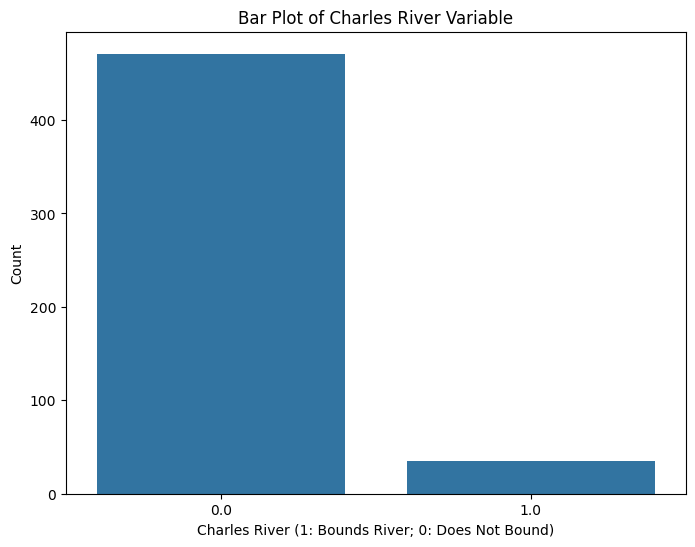

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1: Bounds River; 0: Does Not Bound)')
plt.ylabel('Count')
plt.show()


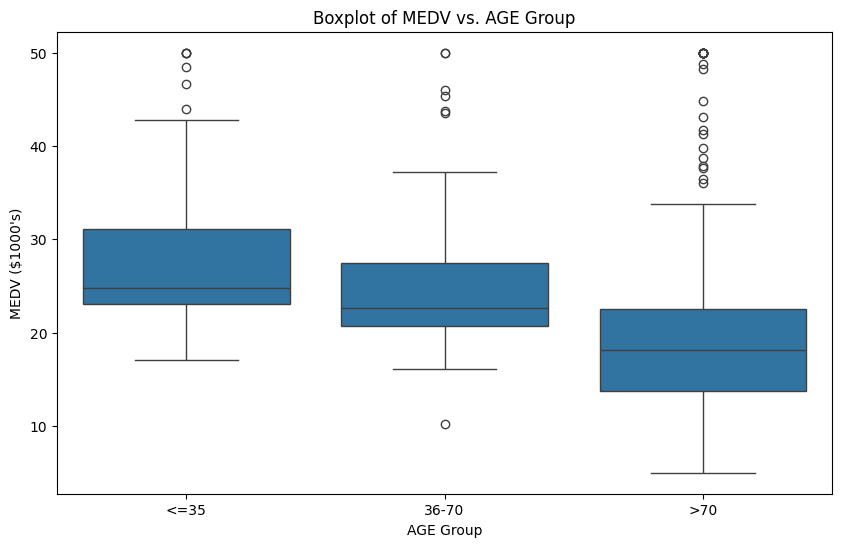

In [50]:
# Discretize AGE into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '>70'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_Group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs. AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000\'s)')
plt.show()


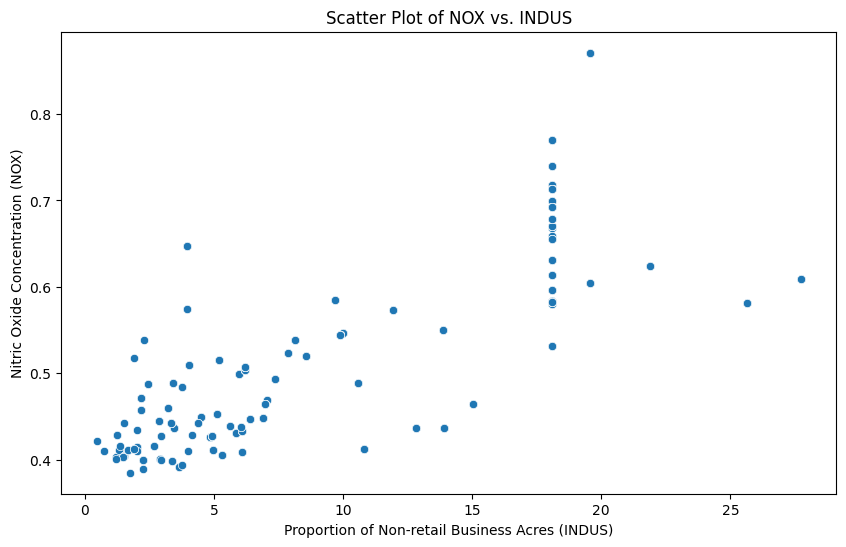

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Scatter Plot of NOX vs. INDUS')
plt.xlabel('Proportion of Non-retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


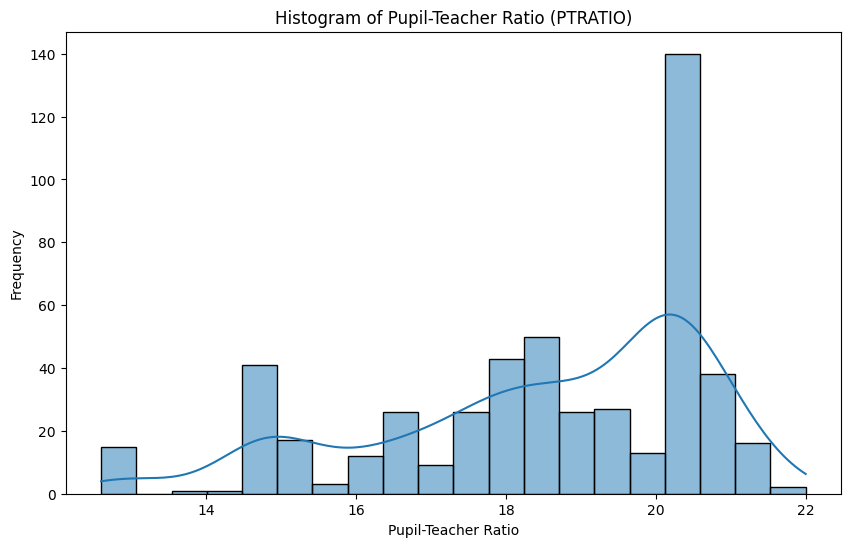

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [53]:
from scipy.stats import ttest_ind

# Split the data based on CHAS
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the t-test
t_stat, p_value = ttest_ind(medv_chas_0, medv_chas_1)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median value of houses bounded by the Charles River.")


T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
There is a significant difference in median value of houses bounded by the Charles River.


In [54]:
from scipy.stats import ttest_ind

# Split the data based on CHAS
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the t-test
t_stat, p_value = ttest_ind(medv_chas_0, medv_chas_1)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median value of houses bounded by the Charles River.")


T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
There is a significant difference in median value of houses bounded by the Charles River.


In [55]:
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {corr}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a significant relationship between NOX and INDUS.")
else:
    print("There is no significant relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
There is a significant relationship between NOX and INDUS.


In [56]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion: Check the p-value of DIS to determine its impact on MEDV


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        19:14:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0